In [528]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [529]:
matches= pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [530]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [531]:
matches.head(10)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [532]:
matches.shape


(756, 18)

In [533]:
deliveries.shape

(179078, 21)

In [534]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [535]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [536]:
total_runs_scored = deliveries.groupby(['match_id','inning'], as_index=False)['total_runs'].sum()
total_runs_scored

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [537]:
total_score_innings1 = total_runs_scored[total_runs_scored['inning']==1]
total_score_innings1 = total_score_innings1.rename(columns={'total_runs': 'total_inning1'})
total_score_innings1

,match_id,inning,total_inning1
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [538]:
total_score_innings2 = total_runs_scored[total_runs_scored['inning']==2]
total_score_innings2 = total_score_innings2.rename(columns={'total_runs': 'total_inning2'})
total_score_innings2

,match_id,inning,total_inning2
1,1,2,172
3,2,2,187
5,3,2,184
7,4,2,164
9,5,2,142
...,...,...,...
1519,11347,2,137
1521,11412,2,140
1523,11413,2,170
1525,11414,2,162


In [539]:
total_runs_match = pd.merge(total_score_innings1, total_score_innings2, on = 'match_id')
total_runs_match['Total']=total_runs_match['total_inning1']+ total_runs_match['total_inning2']
total_runs_match

,match_id,inning_x,total_inning1,inning_y,total_inning2,Total
0,1,1,207,2,172,379
1,2,1,184,2,187,371
2,3,1,183,2,184,367
3,4,1,163,2,164,327
4,5,1,157,2,142,299
...,...,...,...,...,...,...
749,11347,1,143,2,137,280
750,11412,1,136,2,140,276
751,11413,1,171,2,170,341
752,11414,1,155,2,162,317


In [540]:
match_df = matches.merge(total_runs_match[['match_id','total_inning1','total_inning2','Total']], left_on='id', right_on='match_id', how = 'outer')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_inning1,total_inning2,Total
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1.0,207.0,172.0,379.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2.0,184.0,187.0,371.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3.0,183.0,184.0,367.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4.0,163.0,164.0,327.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5.0,157.0,142.0,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347.0,143.0,137.0,280.0
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,...,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412.0,136.0,140.0,276.0
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,...,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413.0,171.0,170.0,341.0
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,...,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414.0,155.0,162.0,317.0


In [541]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [542]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['toss_winner'] = match_df['toss_winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['winner'] = match_df['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')


match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['toss_winner'] = match_df['toss_winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['winner'] = match_df['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')


match_df['team1'] = match_df['team1'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
match_df['team2'] = match_df['team2'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
match_df['toss_winner'] = match_df['toss_winner'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
match_df['winner'] = match_df['winner'].str.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

In [543]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors'], dtype=object)

In [544]:
teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals',
       'Pune Warriors', 'Rising Pune Supergiant']

In [545]:
match_df1 = match_df[match_df['team1'].isin(teams)]
match_df1

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_inning1,total_inning2,Total
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1.0,207.0,172.0,379.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2.0,184.0,187.0,371.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3.0,183.0,184.0,367.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4.0,163.0,164.0,327.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,...,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5.0,157.0,142.0,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347.0,143.0,137.0,280.0
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,...,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412.0,136.0,140.0,276.0
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,...,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413.0,171.0,170.0,341.0
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,...,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414.0,155.0,162.0,317.0


In [546]:
match_df1.shape

(749, 22)

In [547]:
match_df1 = match_df1[match_df1['dl_applied']==0]
match_df1

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_inning1,total_inning2,Total
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1.0,207.0,172.0,379.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2.0,184.0,187.0,371.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3.0,183.0,184.0,367.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4.0,163.0,164.0,327.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,...,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5.0,157.0,142.0,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347.0,143.0,137.0,280.0
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,...,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412.0,136.0,140.0,276.0
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,...,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413.0,171.0,170.0,341.0
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,...,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414.0,155.0,162.0,317.0


In [548]:
match_df1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Pune Warriors'],
      dtype=object)

In [549]:
match_df1.iloc[matches['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2                Delhi Capitals
toss_winner          Delhi Capitals
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
match_id                       44.0
total_inning1                 212.0
total_inning2                  66.0
Total                         278.0
Name: 43, dtype: object

In [550]:
match_df1.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

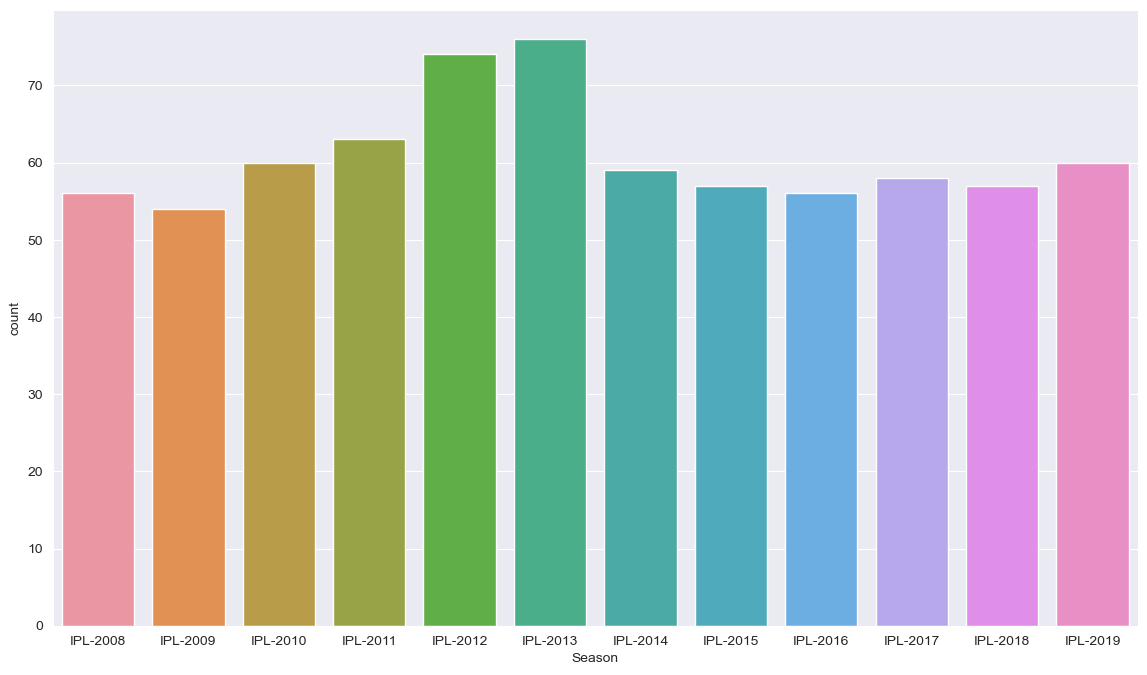

In [551]:
match_df1=match_df1.sort_values(by=['Season'], ascending=True)
sns.countplot(x='Season', data=match_df1, orient='h')
plt.show()

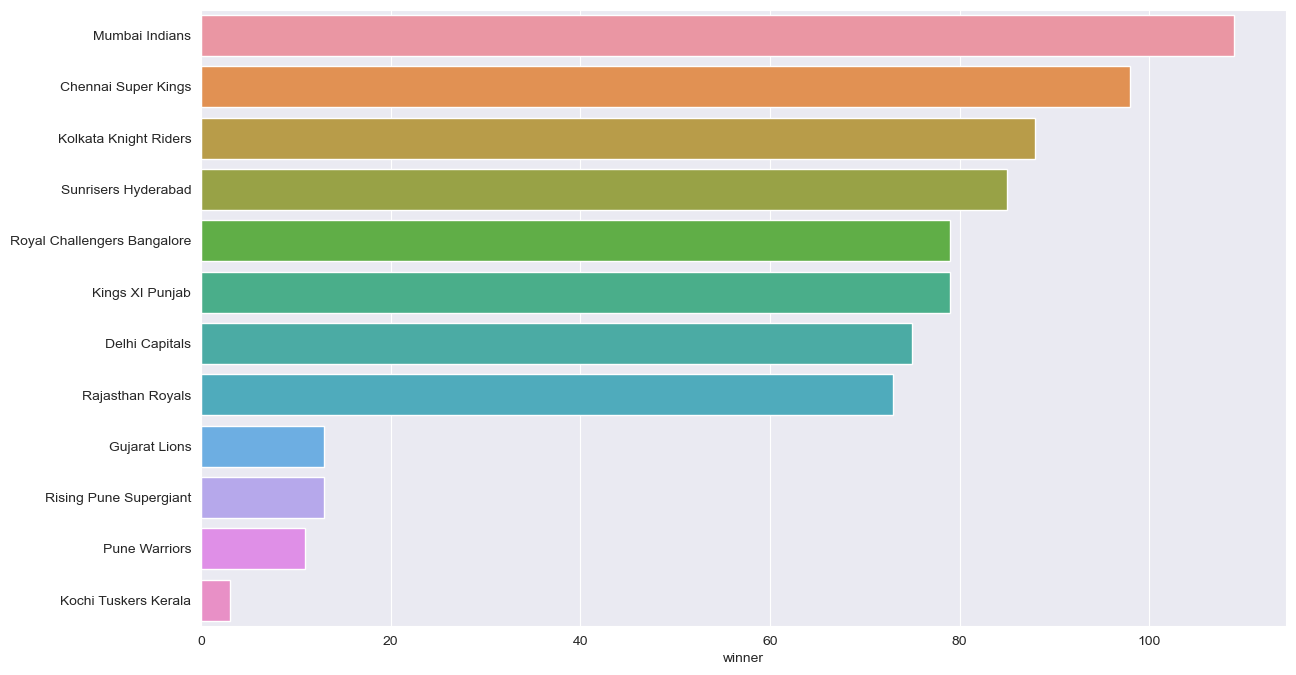

In [552]:
data = match_df1.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

In [553]:
top_players = match_df1.player_of_match.value_counts()[:30]
top_players

AB de Villiers     19
CH Gayle           18
MS Dhoni           17
RG Sharma          17
DA Warner          16
YK Pathan          15
SR Watson          15
SK Raina           14
G Gambhir          13
AM Rahane          12
MEK Hussey         12
DR Smith           11
A Mishra           11
AD Russell         11
V Sehwag           11
KA Pollard         10
JH Kallis          10
V Kohli            10
SP Narine           9
AT Rayudu           9
SE Marsh            9
RA Jadeja           8
SR Tendulkar        8
UT Yadav            8
Harbhajan Singh     8
AC Gilchrist        7
RV Uthappa          7
Rashid Khan         7
SL Malinga          6
A Nehra             6
Name: player_of_match, dtype: int64

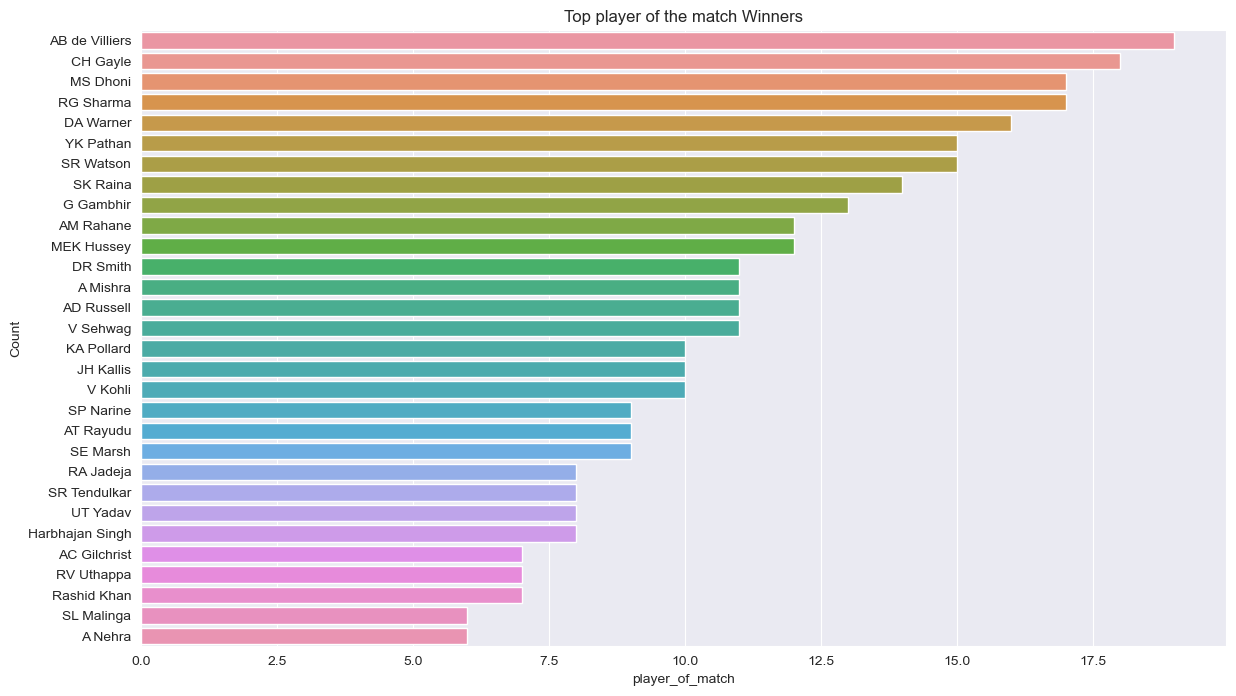

In [554]:
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(y = top_players.index, x = top_players, orient='h'); #palette="Blues");
plt.show()

In [555]:
ss = match_df1['toss_winner'] == match_df1['winner']
ss.groupby(ss).size()


False    349
True     381
dtype: int64

In [556]:
round(ss.groupby(ss).size() / ss.count() * 100,2)


False    47.81
True     52.19
dtype: float64

In [557]:
match_df1[match_df1['win_by_runs']!=0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)


winner
Rajasthan Royals               28.0
Delhi Capitals                 27.0
Kolkata Knight Riders          26.5
Mumbai Indians                 25.0
Chennai Super Kings            24.0
Pune Warriors                  23.0
Rising Pune Supergiant         20.0
Royal Challengers Bangalore    18.5
Kings XI Punjab                18.0
Sunrisers Hyderabad            15.0
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

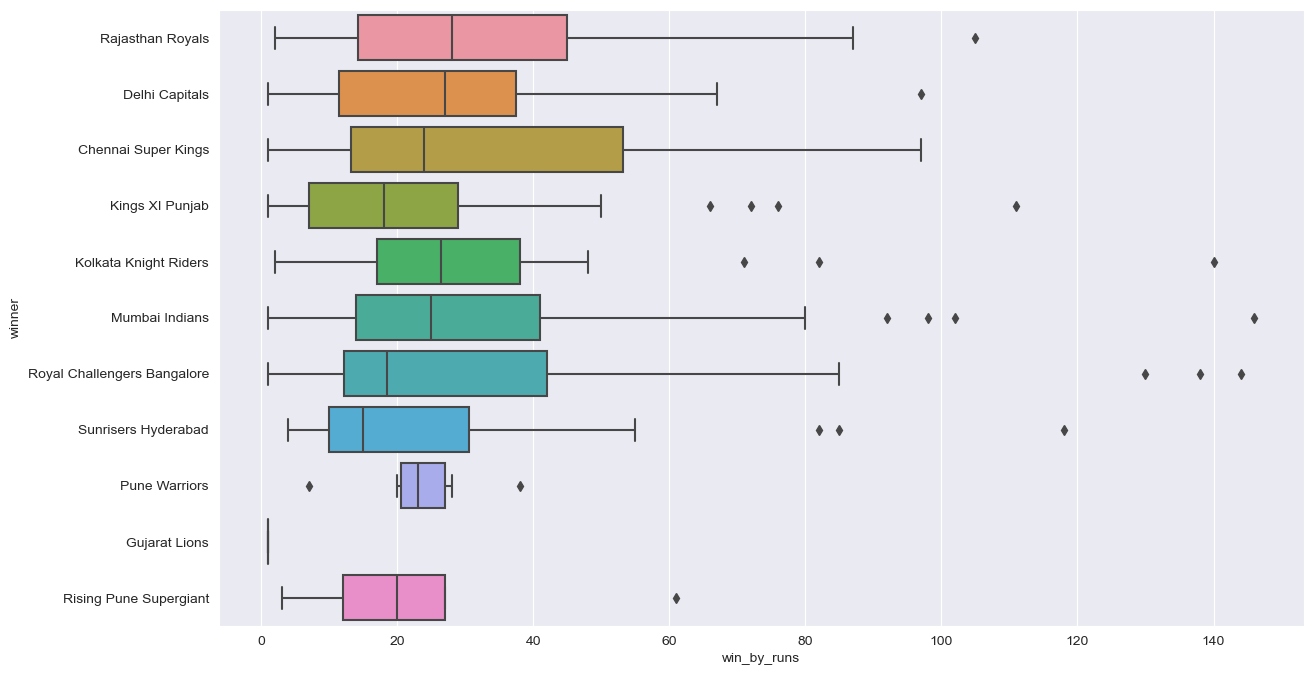

In [558]:
#fig.figsize = [16,10]
#ax.set_ylim([0,20])
ax.set_title("Winning by Runs - Team Performance")
#top_players.plot.bar()
sns.boxplot(y = 'winner', x = 'win_by_runs', data=match_df1[match_df1['win_by_runs']!=0], orient = 'h'); #palette="Blues");
plt.show()


In [559]:
match_df1[match_df1['win_by_wickets']!=0].groupby(['winner'])['win_by_wickets'].apply(np.median).sort_values(ascending = False)


winner
Kochi Tuskers Kerala           8.0
Pune Warriors                  7.0
Royal Challengers Bangalore    7.0
Rising Pune Supergiant         6.5
Chennai Super Kings            6.0
Delhi Capitals                 6.0
Gujarat Lions                  6.0
Kings XI Punjab                6.0
Kolkata Knight Riders          6.0
Mumbai Indians                 6.0
Rajasthan Royals               6.0
Sunrisers Hyderabad            6.0
Name: win_by_wickets, dtype: float64

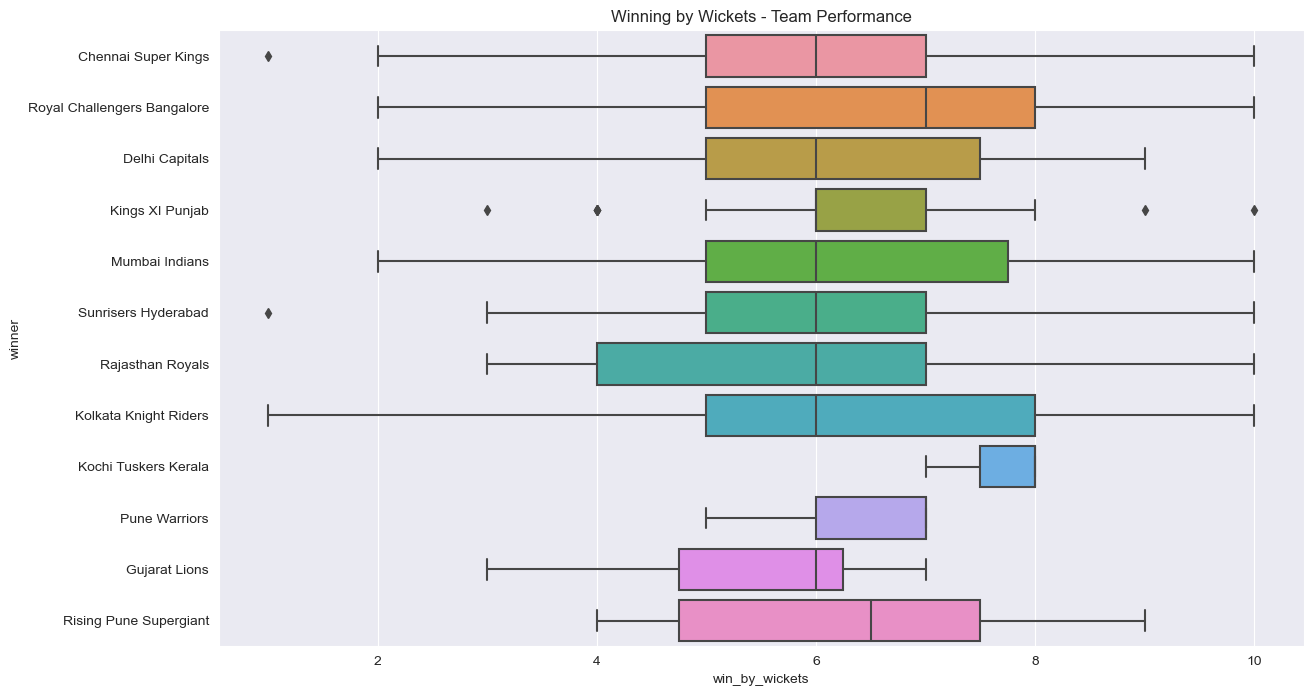

In [560]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
#fig.figsize = [16,10]
#ax.set_ylim([0,20])
ax.set_title("Winning by Wickets - Team Performance")
#top_players.plot.bar()
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=match_df1[match_df1['win_by_wickets']>0], orient = 'h'); #palette="Blues");
plt.show()